# Lecture 11 - Clustering
## 95-791 Data Mining (Fall 2021) 
### Name: Xi Yan
#### Date: November, 2021


In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline
plt.style.use('seaborn-white')

### Before you load the next set of packages you need to install [yellowbrick](https://www.scikit-yb.org/en/latest/quickstart.html).

In [224]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.datasets import load_credit
from yellowbrick.datasets import load_hobbies
from sklearn.datasets import make_blobs

#### Let's simulate some data that we can use for clustering.

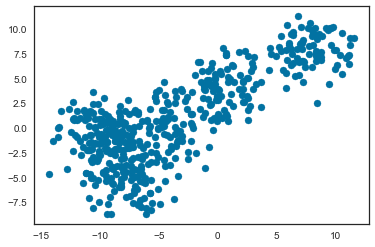

In [225]:
np.random.seed(3)
x, _ = make_blobs(n_samples=500, centers=6, cluster_std=1.8)
plt.scatter(x[:,0], x[:,1])
plt.show()

####  Let's train our [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and fit out data. We will start with the default settings:

In [226]:
model = KMeans(random_state=1)
model.fit(x)
model.labels_

array([4, 7, 1, 7, 1, 0, 2, 5, 6, 6, 7, 5, 0, 0, 3, 1, 7, 2, 4, 7, 3, 5,
       2, 7, 4, 7, 1, 1, 1, 4, 3, 3, 7, 4, 3, 6, 0, 4, 1, 0, 0, 0, 1, 3,
       2, 4, 7, 4, 0, 1, 5, 5, 1, 0, 2, 0, 0, 4, 0, 0, 7, 4, 7, 2, 0, 1,
       4, 1, 2, 5, 2, 2, 1, 1, 4, 2, 2, 4, 2, 4, 3, 4, 1, 7, 3, 2, 3, 6,
       3, 7, 3, 1, 6, 6, 3, 3, 1, 3, 6, 2, 3, 2, 7, 0, 1, 5, 2, 5, 6, 1,
       3, 1, 0, 2, 2, 2, 1, 6, 0, 2, 3, 4, 3, 6, 0, 2, 1, 1, 4, 4, 3, 0,
       1, 6, 6, 2, 1, 4, 6, 7, 5, 6, 1, 7, 1, 1, 4, 3, 7, 5, 3, 5, 6, 6,
       4, 5, 4, 1, 5, 2, 2, 0, 1, 7, 3, 3, 7, 4, 1, 3, 2, 6, 0, 0, 3, 7,
       3, 4, 3, 3, 2, 7, 3, 1, 3, 0, 4, 0, 4, 2, 7, 7, 7, 3, 7, 4, 3, 6,
       0, 1, 3, 5, 2, 4, 7, 3, 1, 2, 1, 7, 7, 3, 3, 6, 7, 7, 7, 3, 7, 6,
       7, 7, 3, 1, 5, 6, 2, 2, 6, 4, 0, 6, 1, 5, 7, 0, 7, 0, 2, 3, 5, 1,
       6, 3, 6, 3, 1, 2, 5, 3, 3, 2, 4, 6, 1, 0, 3, 1, 4, 2, 7, 1, 3, 1,
       2, 0, 1, 2, 4, 1, 4, 2, 7, 7, 7, 0, 3, 0, 4, 2, 1, 4, 3, 3, 5, 1,
       1, 7, 7, 3, 7, 2, 4, 3, 7, 1, 3, 0, 6, 0, 1,

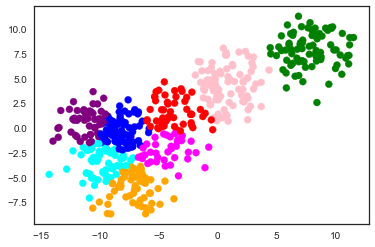

In [227]:
colors = np.array(["red","green","blue","pink","orange","magenta","purple","cyan"])
plt.scatter(x[:,0], x[:,1], c=colors[model.labels_])
plt.show()

#### Quickly, let's look at the membership composition of the clusters.

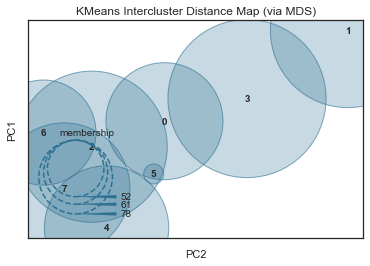

In [228]:
visualizer = InterclusterDistance(model)
visualizer.fit(x) 
visualizer.show();  

## Now we can try to find out what would be an optimal k for our kmeans.

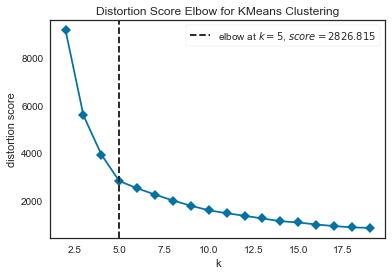

In [229]:
#Create a Kmeans model
model = KMeans(random_state=1)
#run from k=2 to k=20
visualizer = KElbowVisualizer(model, k=(2,20), timings = False)
visualizer.fit(x)
visualizer.show(); 

To be sure we are going to calculate the optimal k with Calinski Harabazs as well.

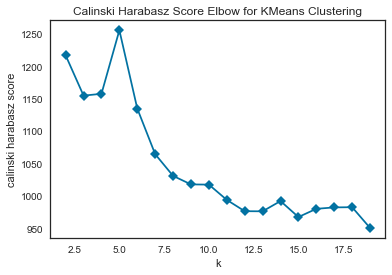

In [230]:
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz',locate_elbow=False, timings=False)
visualizer.fit(x)
visualizer.show();

Both metrics are telling us that the optimal number of k is 5. Let's take a look!

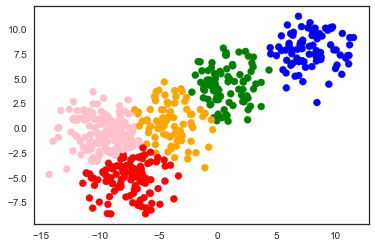

In [231]:
model_tuned = KMeans(random_state=1, n_clusters=5).fit(x)
plt.scatter(x[:,0], x[:,1], c=colors[model_tuned.labels_])
plt.show()

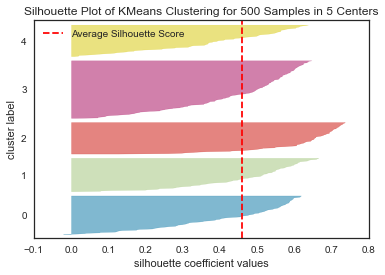

In [232]:
visualizer = SilhouetteVisualizer(model_tuned, colors='yellowbrick')
visualizer.fit(x) 
visualizer.show();    

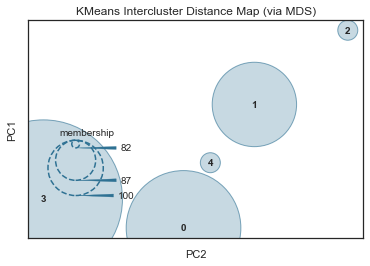

In [233]:
visualizer = InterclusterDistance(model_tuned)
visualizer.fit(x) 
visualizer.show();  

# Your turn!

In [234]:
mall_customers = pd.read_csv("Mall_Customers.csv")
mall_customers.head()
mall_customers['Gender']=pd.get_dummies(mall_customers['Gender'],drop_first=True)
mall_customers.drop(['CustomerID'],axis=1,inplace=True)
mall_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


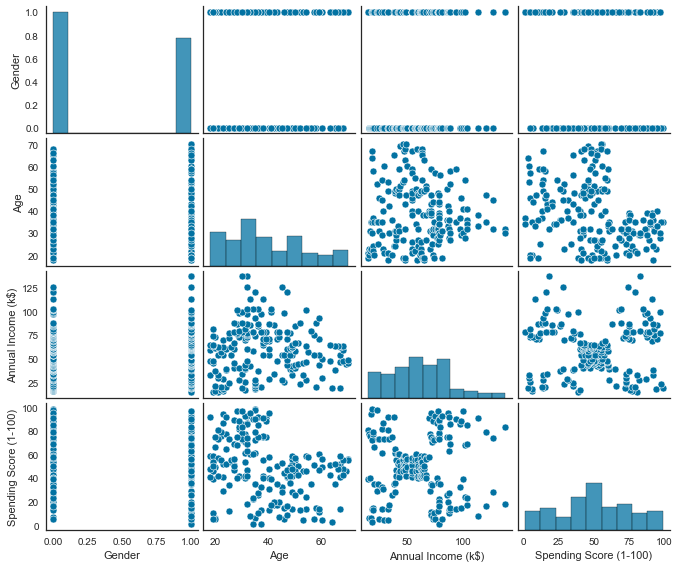

In [235]:
sns.pairplot(mall_customers, aspect=1.2, height=2);

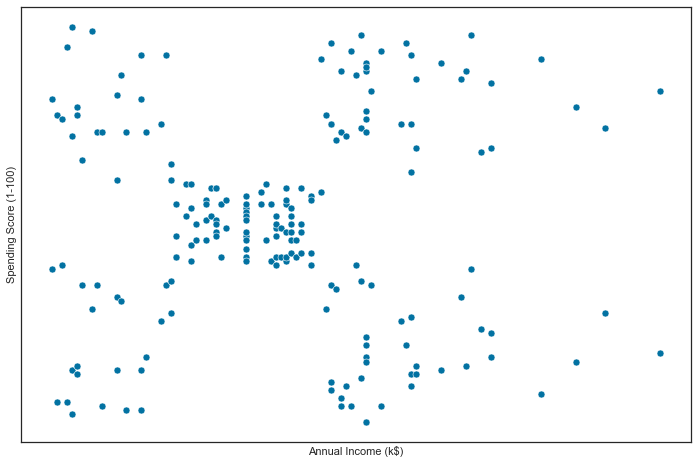

In [236]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_customers, ax=ax);
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.show();

Now you must go through the process of finding out the clusters for this dataset. Here are some steps to guide you:
* Create a KMeans object
* Fit that object with your data (mall_customers)
Figure out the best k for your kmeans:
    * Draw an elbow plot
    * Draw a an elbow plot with calinski-harabazs metric
        * Are both `k`s the same?
    * Draw a sillhouette plot
        * Are your clusters well formed?
    * Draw an InterclusterDistance plot
        * Are your clusters properly separated or is there an overlap?
    * Plot your `Annual Income` vs `Spending Score (1-100)`, coloring the points with the labels from your tuned model.

You may use as many cells as you well, just include comments to indicate the step you are in.

In [237]:
mall_customers.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [238]:
model = KMeans(random_state=1)
model.fit(mall_customers)
model.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 6, 3, 6, 2,
       0, 3, 6, 2, 2, 2, 6, 2, 2, 6, 6, 6, 6, 6, 2, 6, 6, 2, 6, 6, 6, 2,
       6, 6, 2, 2, 6, 6, 6, 6, 6, 2, 6, 2, 2, 6, 6, 2, 6, 6, 2, 6, 6, 2,
       2, 6, 6, 2, 6, 2, 2, 2, 6, 2, 6, 2, 2, 6, 6, 2, 6, 2, 6, 6, 6, 6,
       6, 2, 2, 2, 2, 2, 6, 6, 6, 6, 2, 2, 2, 1, 2, 1, 4, 1, 4, 1, 4, 1,
       2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5], dtype=int32)

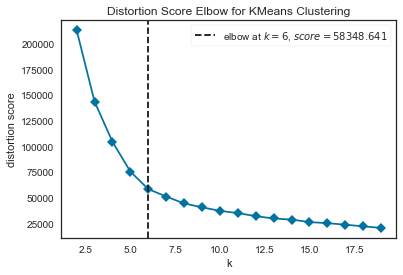

In [239]:
visualizer = KElbowVisualizer(model, k=(2,20), timings = False)
visualizer.fit(mall_customers)
visualizer.show();

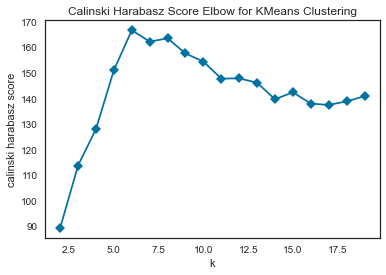

In [240]:
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz',locate_elbow=False, timings=False)
visualizer.fit(mall_customers)
visualizer.show();

Optimal cluster = 6

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


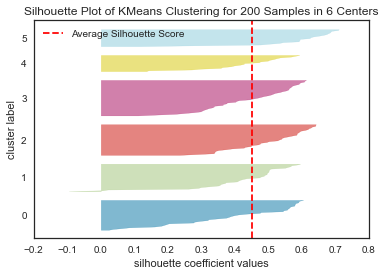

In [241]:
model_tuned = KMeans(random_state=1, n_clusters=6).fit(mall_customers)

visualizer = SilhouetteVisualizer(model_tuned, colors='yellowbrick')
visualizer.fit(mall_customers)
visualizer.show();

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


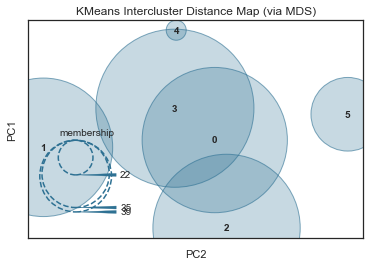

In [242]:
visualizer = InterclusterDistance(model_tuned)
visualizer.fit(mall_customers)
visualizer.show();

---

# Stop Here!

---

## Hierarchical Clustering

In [243]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as shc

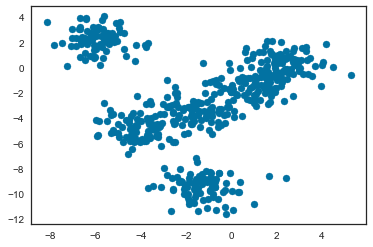

In [244]:
np.random.seed(2)
x, _ = make_blobs(n_samples=500, centers=6, cluster_std=.9)
plt.scatter(x[:,0], x[:,1])
plt.show()


In [245]:
hc_avg=AgglomerativeClustering(n_clusters=5,linkage='average')
hc_avg.fit_predict(x)
print(hc_avg.labels_)

[0 1 2 1 1 2 2 0 1 1 2 3 2 1 1 2 2 2 1 2 1 0 0 2 1 2 1 1 1 0 1 2 0 3 1 2 1
 2 3 3 0 3 2 3 1 2 0 2 3 2 0 0 1 2 0 0 1 2 2 2 3 0 3 2 2 1 1 1 0 0 1 2 1 2
 2 1 0 2 1 2 2 1 0 1 1 3 3 2 3 3 3 1 2 2 3 2 0 1 3 1 2 3 1 2 1 2 1 1 1 3 2
 2 2 2 2 1 3 1 1 1 3 2 2 1 3 1 0 3 2 3 2 0 0 1 2 0 0 2 1 2 2 2 2 2 1 1 3 3
 0 1 2 3 0 2 0 2 2 2 2 2 1 2 0 0 1 3 1 2 1 2 0 1 2 0 1 1 2 2 2 2 2 2 1 0 0
 1 0 1 2 2 0 0 1 3 0 1 1 1 2 1 2 2 2 2 1 2 1 2 3 1 1 2 1 0 1 1 0 1 2 2 2 2
 3 2 3 0 1 2 2 1 2 2 1 0 2 1 1 2 3 0 2 1 0 3 3 1 2 0 4 1 1 2 0 1 0 1 3 3 3
 3 1 2 2 0 1 0 1 1 3 1 2 1 2 1 2 0 2 1 2 1 1 3 2 3 1 1 3 3 0 0 1 2 2 0 2 0
 2 3 3 2 1 2 3 2 2 3 2 2 3 1 2 3 3 3 2 3 2 2 2 2 1 2 2 0 1 2 2 1 0 1 3 0 1
 0 1 1 3 0 3 2 3 3 2 1 1 3 2 2 2 3 1 2 3 1 0 1 1 0 1 2 1 3 1 3 3 0 0 2 1 2
 1 3 2 3 2 1 3 1 2 0 0 1 0 2 1 1 1 2 2 2 1 3 1 1 0 1 1 3 1 1 0 1 2 2 1 2 2
 0 0 1 2 3 2 2 3 1 3 0 2 2 2 1 2 3 1 1 3 1 1 1 2 0 3 2 1 1 2 1 3 1 2 1 1 1
 0 3 0 0 0 2 2 0 1 2 2 1 0 1 1 0 2 0 0 2 1 2 1 1 2 1 0 3 1 0 1 2 1 3 2 0 2
 3 1 2 2 1 3 2 2 3 2 0 1 

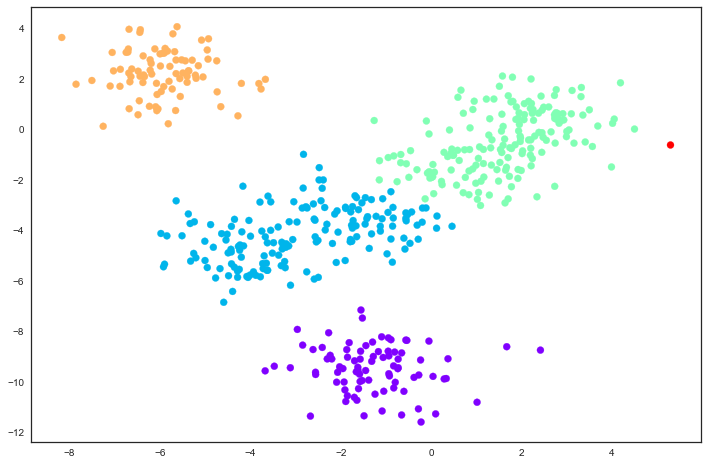

In [246]:
plt.figure(figsize=(12, 8))
plt.scatter(x[:,0], x[:,1], c=hc_avg.labels_, cmap='rainbow')

In [247]:
hc_ward=AgglomerativeClustering(n_clusters=5,linkage='ward')
hc_ward.fit(x)
print(hc_ward.labels_)

[3 1 0 1 1 0 0 3 1 1 0 2 0 4 1 0 0 0 1 0 4 3 3 0 4 0 4 1 1 3 4 0 3 2 4 0 4
 0 2 2 3 2 0 2 4 0 3 0 2 0 3 3 4 0 3 3 4 0 0 0 2 3 2 0 0 4 1 4 3 3 4 0 1 0
 0 1 3 0 1 0 0 4 3 1 1 2 2 0 2 2 2 1 0 0 2 0 3 1 2 4 0 2 4 0 4 0 4 4 4 2 0
 0 0 0 0 4 2 1 1 1 2 0 0 1 2 1 3 2 0 2 0 3 3 4 0 3 3 0 4 0 0 0 0 0 1 4 2 2
 3 4 0 2 3 0 3 0 0 0 0 0 1 0 3 3 1 2 4 0 1 0 3 1 0 3 4 1 0 0 0 0 0 0 4 3 3
 1 3 4 0 0 3 3 4 2 3 4 1 4 0 1 0 0 0 0 1 0 1 0 2 1 4 0 1 3 1 1 3 4 0 0 0 0
 2 0 2 3 4 0 0 1 0 0 4 3 0 1 4 0 2 3 0 4 3 2 2 4 0 3 0 4 1 0 3 4 3 4 2 2 2
 2 4 0 0 3 4 3 4 1 2 1 0 1 0 4 0 3 0 4 0 4 1 2 0 2 4 1 2 2 3 3 4 0 0 3 0 3
 0 2 2 0 1 0 2 0 1 2 0 1 2 4 0 2 2 2 0 2 0 0 0 0 4 0 0 3 1 0 0 1 3 4 2 3 1
 3 4 1 2 3 2 0 2 2 0 1 1 2 0 0 0 2 4 0 2 4 3 4 4 3 1 0 4 2 4 2 2 3 3 0 1 0
 1 2 0 2 0 4 2 4 0 3 3 1 3 0 4 1 1 0 0 0 1 2 4 1 3 4 4 2 1 1 3 4 0 0 1 0 0
 3 3 1 0 2 0 0 2 1 2 3 0 0 0 1 0 2 1 1 2 4 1 1 0 3 2 0 4 4 0 1 2 4 0 4 1 4
 3 2 3 3 3 0 0 3 1 0 0 1 3 1 4 3 0 3 3 0 1 0 1 1 0 4 3 2 4 3 1 0 1 2 0 3 0
 2 1 0 0 4 2 0 0 2 0 3 1 

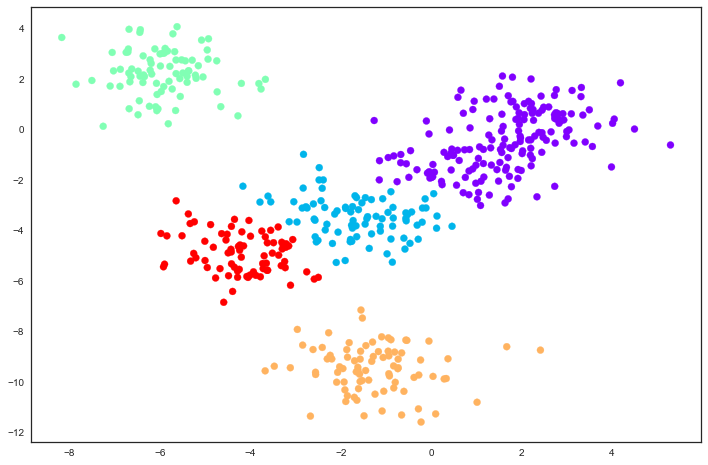

In [248]:
plt.figure(figsize=(12, 8))
plt.scatter(x[:,0], x[:,1], c=hc_ward.labels_, cmap='rainbow')

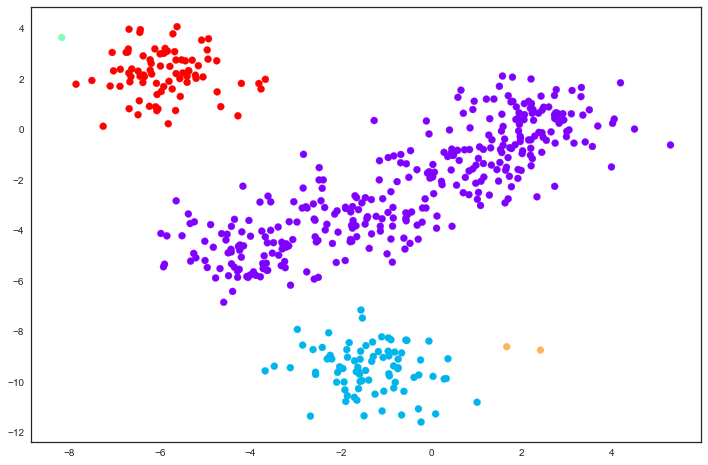

In [249]:
hc_single=AgglomerativeClustering(n_clusters=5,linkage='single').fit(x)
plt.figure(figsize=(12, 8))
plt.scatter(x[:,0], x[:,1], c=hc_single.labels_, cmap='rainbow');

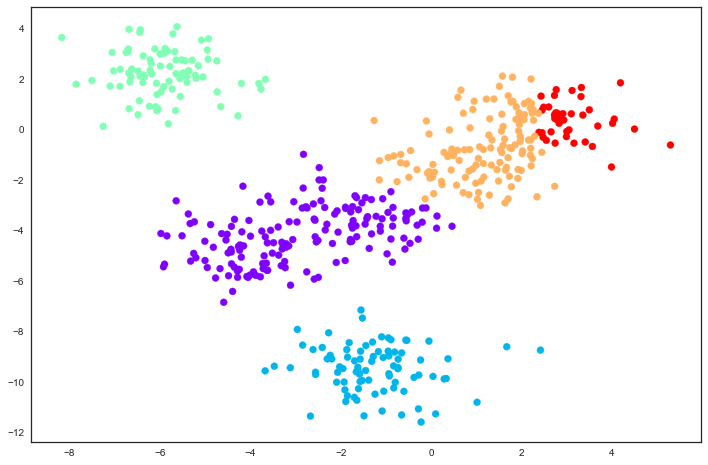

In [250]:
hc_complete=AgglomerativeClustering(n_clusters=5,linkage='complete').fit(x)
plt.figure(figsize=(12, 8))
plt.scatter(x[:,0], x[:,1], c=hc_complete.labels_, cmap='rainbow')

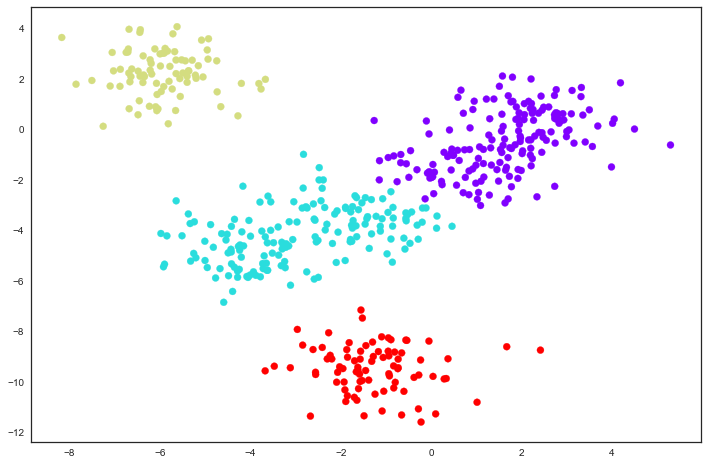

In [251]:
hc_ward=AgglomerativeClustering(n_clusters=4,linkage='complete').fit(x)
plt.figure(figsize=(12, 8))
plt.scatter(x[:,0], x[:,1], c=hc_ward.labels_, cmap='rainbow')

# Your Turn!

Now you must go through the process of finding out the clusters and linkage method for the mall_customers dataset. Here are some steps to guide you:
* Create a AgglomerativeClustering object
* Fit that object with your data (mall_customers)

Figure out the best k for your hierarchical clustering:
    * Draw an elbow plot
    * Draw a an elbow plot with calinski-harabazs metric
        * Are both `k`s the same?
    * Plot your `Annual Income` vs `Spending Score (1-100)`, coloring the points with the labels from your tuned model. Repeat each plot for the same number of clusters, but different linkage method. You should have 4 plots in total.
    * Which plot looks like the best one for this dataset? How many clusters and what linkage did you choose?


You may use as many cells as you well, just include comments to indicate the step you are in.

In [252]:
x = mall_customers[['Annual Income (k$)', 'Spending Score (1-100)']]

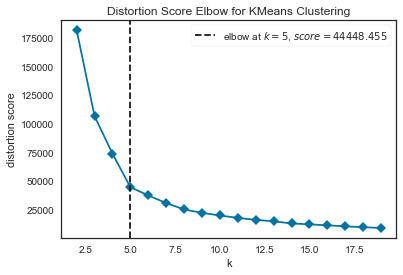

In [253]:
model = KMeans(random_state=1)
#run from k=2 to k=20
visualizer = KElbowVisualizer(model, k=(2,20), timings = False)
visualizer.fit(x)
visualizer.show();

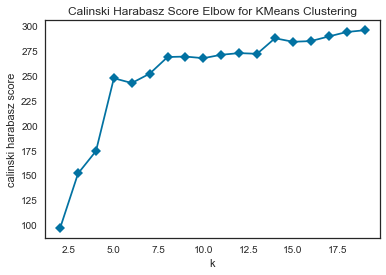

In [254]:
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz',locate_elbow=False, timings=False)
visualizer.fit(x)
visualizer.show();

In [255]:
hc_ward=AgglomerativeClustering(n_clusters=4,linkage='ward')
hc_ward.fit(mall_customers)
print(hc_ward.labels_)


[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 0 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


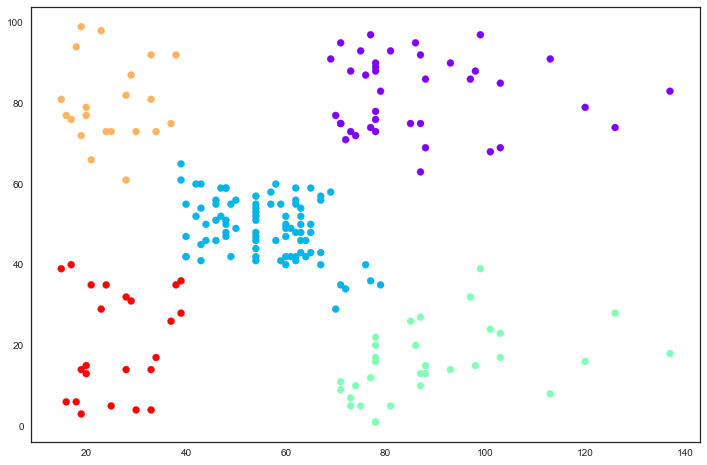

In [256]:
hc_complete=AgglomerativeClustering(n_clusters=5,linkage='complete').fit(x)
plt.figure(figsize=(12, 8))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=hc_complete.labels_, cmap='rainbow')

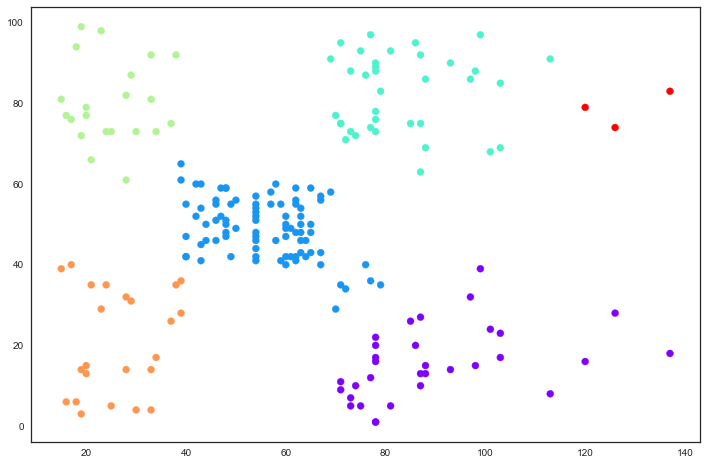

In [257]:
hc_ward=AgglomerativeClustering(n_clusters=6,linkage='complete').fit(x)
plt.figure(figsize=(12, 8))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=hc_ward.labels_, cmap='rainbow')

The fifth plot is the best.